In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv('C:/Users/se302/Documents/PROGRAMACION/Ciencia de datos/doc/Economy of the United States.csv')

In [24]:
df.dtypes

Year                                 int64
GDP (in Bil. US$PPP)               float64
GDP per capita (in US$ PPP)        float64
GDP (in Bil. US$nominal)           float64
GDP per capita (in US$ nominal)    float64
GDP growth (real)                   object
Inflation rate (in Percent)         object
Unemployment (in Percent)           object
Government debt (in % of GDP)       object
dtype: object

In [34]:
print("=== INFORMACIÓN DEL DATASET ===")
print(f"Columnas: {df.columns.tolist()}")
print(f"Shape: {df.shape}")
print("\nPrimeras 5 filas:")
print(df.head())



=== INFORMACIÓN DEL DATASET ===
Columnas: ['Year', 'GDP (in Bil. US$PPP)', 'GDP per capita (in US$ PPP)', 'GDP (in Bil. US$nominal)', 'GDP per capita (in US$ nominal)', 'GDP growth (real)', 'Inflation rate (in Percent)', 'Unemployment (in Percent)', 'Government debt (in\xa0% of GDP)']
Shape: (48, 9)

Primeras 5 filas:
   Year  GDP (in Bil. US$PPP)  GDP per capita (in US$ PPP)  \
0  1980                2857.3                      12552.9   
1  1981                3207.0                      13948.7   
2  1982                3343.8                      14405.0   
3  1983                3634.0                      15513.7   
4  1984                4037.7                      17086.4   

   GDP (in Bil. US$nominal)  GDP per capita (in US$ nominal)  \
0                    2857.3                          12552.9   
1                    3207.0                          13948.7   
2                    3343.8                          14405.0   
3                    3634.0                        


=== GENERANDO BOXPLOTS ===


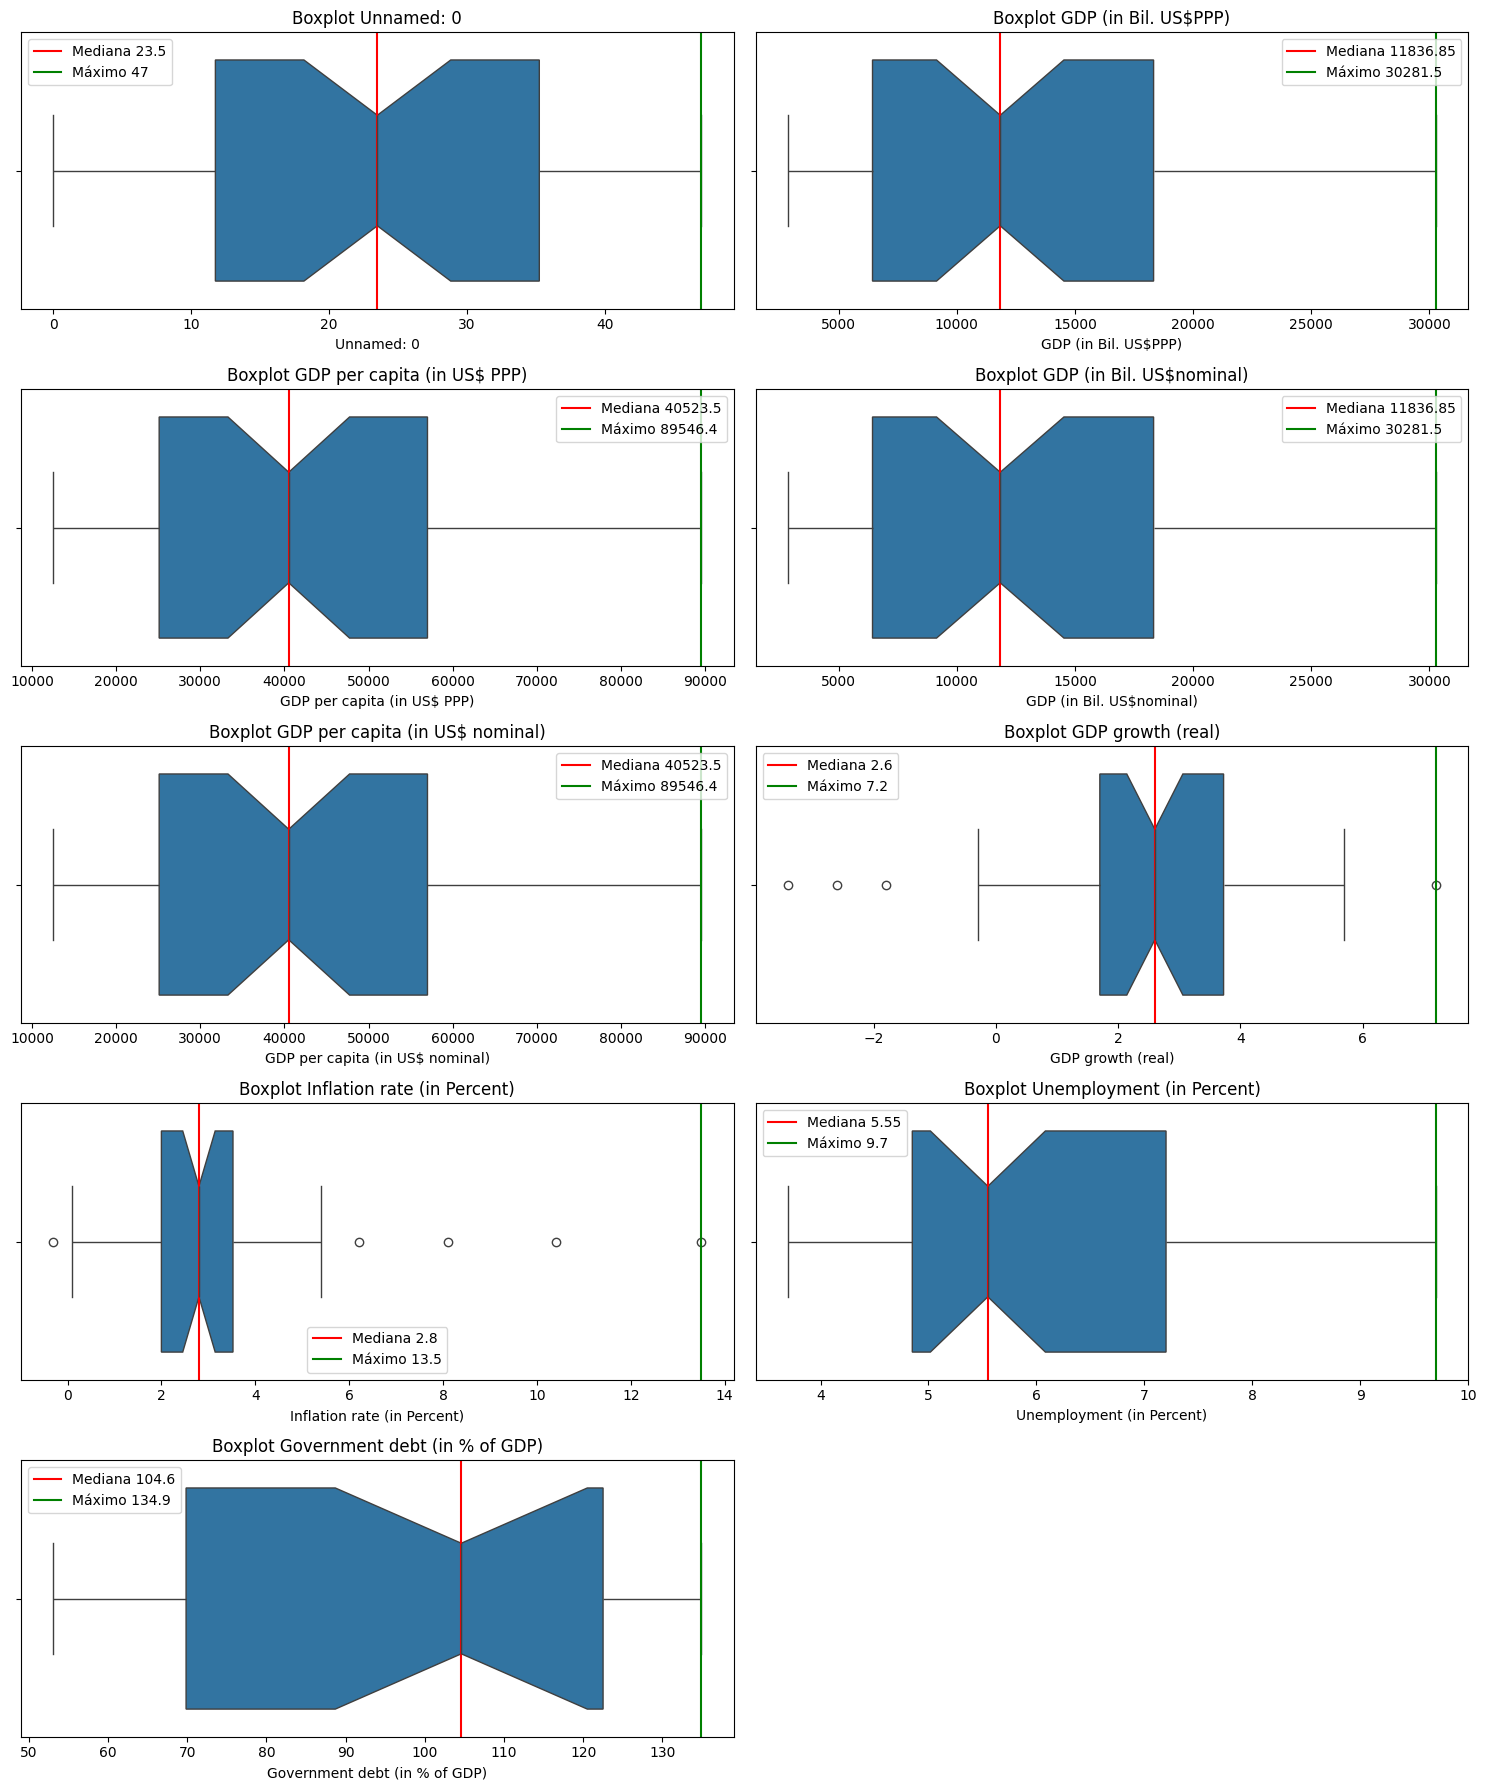


=== ESTADÍSTICAS DESCRIPTIVAS ===
       Unnamed: 0     Year  GDP (in Bil. US$PPP)  GDP per capita (in US$ PPP)  \
count       48.00    48.00             48.000000                    48.000000   
mean        23.50  2003.50          13182.360417                 43192.318750   
std         14.00    14.00           7817.386178                 21396.888688   
min          0.00  1980.00           2857.300000                 12552.900000   
25%         11.75  1991.75           6429.750000                 25120.375000   
50%         23.50  2003.50          11836.850000                 40523.500000   
75%         35.25  2015.25          18328.275000                 57007.275000   
max         47.00  2027.00          30281.500000                 89546.400000   

       GDP (in Bil. US$nominal)  GDP per capita (in US$ nominal)  \
count                 48.000000                        48.000000   
mean               13182.360417                     43192.318750   
std                 7817.386178

In [ ]:

#  Función Multi_boxplot corregida
def Multi_boxplot(dataframe: pd.DataFrame) -> None:
    """
    Función que genera múltiples boxplots a partir de un dataframe dado.
    """
    # Excluir la columna Year para los boxplots
    plot_columns = [col for col in dataframe.columns if col != 'Year']
    
    plt.figure(figsize=[15, 18])
    n = 1
    for f in plot_columns:
        mediana_agrupada = dataframe[f].median()
        maximo = dataframe[f].max()
        plt.subplot(5, 2, n)
        sns.boxplot(x=dataframe[f], data=dataframe, notch=True)
        plt.axvline(x=mediana_agrupada, color='r', linestyle='-', label=f'Mediana {round(mediana_agrupada, 4)}')
        plt.axvline(x=maximo, color='g', linestyle='-', label=f'Máximo {round(maximo, 4)}')
        plt.legend()
        plt.title(f'Boxplot {f}')
        n = n + 1
    plt.tight_layout()
    plt.show()

#  Ejecutar la función
print("\n=== GENERANDO BOXPLOTS ===")
Multi_boxplot(df)

#  Información adicional
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe())